# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
#Seu código aqui
# Verificação do tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [4]:
# Verificação de dados faltantes
(df.isnull().sum()/len(df))*100

,0
Valor_Aluguel,0.0
Valor_Condominio,0.0
Metragem,0.0
N_Quartos,0.0
N_banheiros,0.0
N_Suites,0.0
N_Vagas,0.0


###Não foram encontrados dados faltantes dentro do DataFrame e o tipo de dados correspondem da forma correta como devem estar para a análise e pré-processamento

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [5]:
#Seu código aqui
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


###Após usar a função describe fica questionável a presença de outliers nas categorias 'Valor_Aluguel' e 'Valor_Condominio'

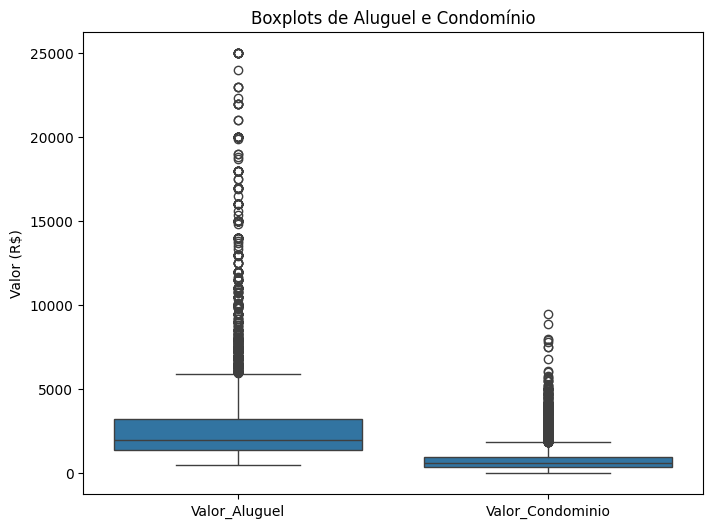

In [6]:
#Box-plot para identificar os outliers
df_melted = df[['Valor_Aluguel','Valor_Condominio']].melt(var_name='Categoria', value_name='Valor')

plt.figure(figsize=(8,6))
sns.boxplot(x='Categoria', y='Valor', data=df_melted)

plt.title('Boxplots de Aluguel e Condomínio')
plt.ylabel('Valor (R$)')
plt.xlabel('')

plt.show()

In [7]:
fig = px.box(df, y='Valor_Aluguel', title='Box Plot de Valor_Aluguel', labels={'Valor_Aluguel': 'Valores'})
fig.show()

In [8]:
fig = px.box(df, y='Valor_Condominio', title='Box Plot de Valor_Condominio', labels={'Valor_Condominio': 'Valores'})
fig.show()

###Apesar de todos os valores acima da upper fence para ambas as categorias, decidi ainda não mexer nelas, pois estes valores possuem uma crescente e não parecem ter sido digitados de forma errônea. Além do fato de existirem realmente alugueis no valor de 25k e condomínios de 9,5k.

In [9]:
# Análise bivariada
fig = px.scatter(
    df,
    x="N_Quartos",
    y="Metragem",
    color="N_Quartos",
    size="Metragem",
    hover_data=df.columns
)

fig.update_layout(
    title="Análise Bivariada: Metragem x Número de Quartos",
    xaxis_title="Número de Quartos",
    yaxis_title="Metragem (m²)",
    template="plotly_white"
)

fig.show()

###Fazendo pesquisas pelo potly encontrei este gráfico que traz os dados em geral de uma forma dinâmica e bem fácil de entender. Além de trazer de forma crescente os dados daanálise bivariada da metragem com o números de quartos, por meio deste gráfico foi possível perceber possíveis inconsistencias, como por exemplo: Um imóvel com 1 quarto, 2 banheiros, 1 suíte, 2 vagas de 138 metros quadrados no valor de R$15k
#### Enquanto imóveis com o 4 quartos possuem um valor menor.

In [10]:
bins = [0, 50, 100, 150, 200, 300, 500, df['Metragem'].max()]
labels = ['0-50m²', '51-100m²', '101-150m²', '151-200m²', '201-300m²', '301-500m²', '500m²+']

df['Faixa_Metragem'] = pd.cut(df['Metragem'], bins=bins, labels=labels, include_lowest=True)

# Calcular média do aluguel pela metragem
df_grouped = df.groupby('Faixa_Metragem', as_index=False)['Valor_Aluguel'].mean()

# Gráfico de barras
fig = px.bar(
    df_grouped,
    x='Faixa_Metragem',
    y='Valor_Aluguel',
    text='Valor_Aluguel',
    title="Média do Valor do Aluguel por Metragem",
    labels={"Faixa_Metragem": "Metragem", "Valor_Aluguel": "Valor Médio do Aluguel (R$)"},
    template="plotly_white"
)

fig.update_traces(texttemplate='R$ %{text:.0f}', textposition='outside')

fig.show()

/tmp/ipython-input-1945779756.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



###Neste gráfico optei por trabalhar com a média do valor de aluguel, desta forma consigo fazer uma escala sob os os metros quadrados das propriedades. Por não ter mexido no DataFrame inicialmente transformando os outliers em media ou meidana os dados se tornam mais maleáveis para trazer insights.
####Por meio desta análise foi possível perceber que os que os valores de aluguel acompanha a crescente da metragem dos imóveis, desta forma podemos ter como conclusão que quanto maior a área do imóvel, também será maior o preço do aluguel.

In [11]:
bins = [0, 500, 1000, 2000, 3000, 5000, df['Valor_Condominio'].max()]
labels = ['0-500', '501-1000', '1001-2000', '2001-3000', '3001-5000', '5000+']

df['Faixa_Condominio'] = pd.cut(df['Valor_Condominio'], bins=bins, labels=labels, include_lowest=True)

# Calcular mediana do aluguel e Condomínio
df_grouped = df.groupby('Faixa_Condominio', as_index=False)['Valor_Aluguel'].median()

# Gráfico de barras
fig = px.bar(
    df_grouped,
    x="Faixa_Condominio",
    y="Valor_Aluguel",
    text="Valor_Aluguel",
    title="Valor do Aluguel com o Valor do Condomínio",
    labels={"Faixa_Condominio": "Condomínio (R$)", "Valor_Aluguel": "Mediana do Aluguel (R$)"},
    template="plotly_white"
)

fig.update_traces(texttemplate='R$ %{text:.0f}', textposition='outside')
fig.show()

/tmp/ipython-input-3993553485.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



###Apenas para fim de dinamismo neste optei por utilizar a mediana do valor do aluguel, já que são valores parelhos. Por meio deste gráfico também foi possível perceber que os valores de condomínio acompanham os valores do aluguel, quanto maior o valor do aluguel, maior será o valor do condomínio. Faz bastante sentido e segue a normalidade do dia-a-dia.


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




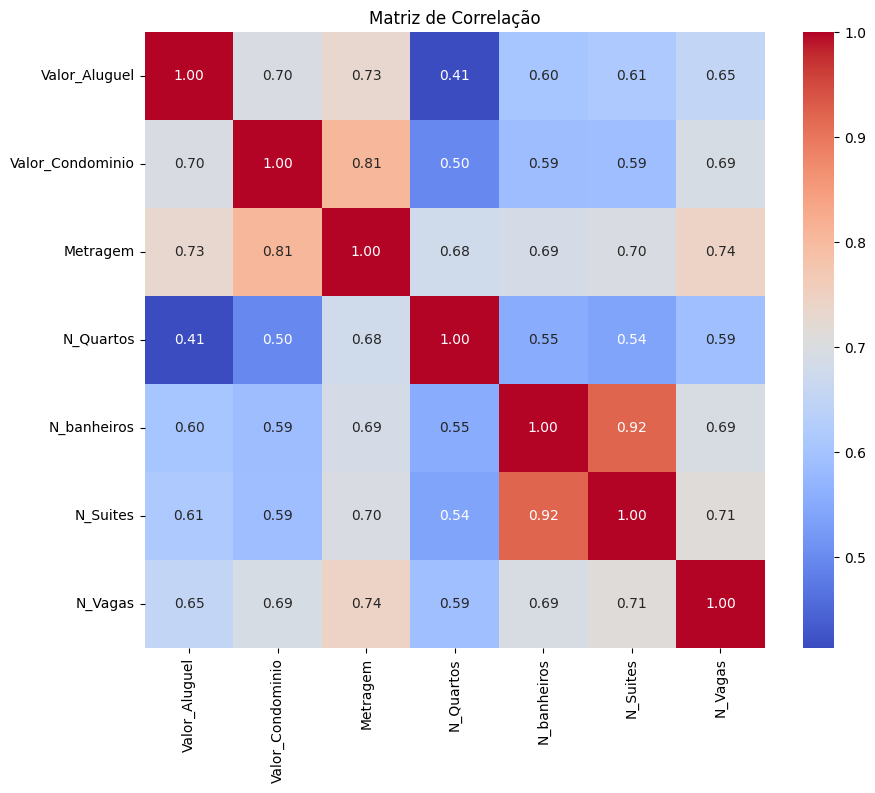

In [12]:
#Seu código aqui
# Código de correlação
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

###É possível perceber que algumas categorias possuem uma boa correlação com outras como por exemplo:


*   Metragem com N_Vagas 74%
*   N_Suites com N_Suites 92%
*   N_Suites com Metragem 70%
*   Metragem com Valor_Condomínio 81%
*   Valor_Aluguel com Metragem 73%

###Desta forma podemos tirar algumas conclusões básicas principalmente o ponto onde a correlação é mais forte perante as categorias presentes dentro do DataFrame.








B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [61]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Faixa_Metragem,Faixa_Condominio
6931,1350,176,3,4,3,3,151-200m²,1001-2000
4125,680,70,1,1,0,2,51-100m²,501-1000
6079,650,66,2,1,0,1,51-100m²,501-1000
5044,655,68,3,2,1,1,51-100m²,501-1000
2299,330,33,1,1,0,1,0-50m²,0-500
...,...,...,...,...,...,...,...,...
3772,450,48,2,2,1,1,0-50m²,0-500
5191,570,34,1,1,0,1,0-50m²,501-1000
5226,976,95,2,2,1,1,51-100m²,501-1000
5390,550,74,3,3,1,2,51-100m²,501-1000


In [67]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Faixa_Metragem,Faixa_Condominio
3885,484,50,2,1,0,1,0-50m²,0-500
4661,680,50,2,1,0,1,0-50m²,501-1000
1038,0,58,2,2,1,1,51-100m²,0-500
5867,1226,127,3,1,0,2,101-150m²,1001-2000
5099,697,90,4,3,1,2,51-100m²,501-1000
...,...,...,...,...,...,...,...,...
4689,1250,160,3,3,1,2,151-200m²,1001-2000
5313,530,43,1,2,1,1,0-50m²,501-1000
5624,1250,147,4,4,2,3,101-150m²,1001-2000
4647,650,53,2,1,0,1,51-100m²,501-1000


In [68]:
y_train

,Valor_Aluguel
6931,10000
4125,2200
6079,4500
5044,2900
2299,1500
...,...
3772,2000
5191,3000
5226,3000
5390,3200


In [69]:
y_test

,Valor_Aluguel
3885,2100
4661,2500
1038,1200
5867,4000
5099,3000
...,...
4689,2550
5313,3100
5624,3500
4647,2500


In [70]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (5402, 8)
Tamanho de X_test: (1801, 8)
Tamanho de y_train: (5402,)
Tamanho de y_test: (1801,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [58]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [59]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
X

,Metragem
6931,176
4125,70
6079,66
5044,68
2299,33
...,...
3772,48
5191,34
5226,95
5390,74


In [60]:
regressao_linear = LinearRegression()
regressao_linear.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [47]:
#Seu código Aqui
regressao_linear.intercept_

np.float64(-103.17820863080306)

In [48]:
regressao_linear.coef_

array([34.70818769])

Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [65]:
#Seu código aqui
X_train_metragem = X_train[['Metragem']]
X_test_metragem  = X_test[['Metragem']]

regressao_linear.fit(X_train_metragem, y_train)

r_quadrado = regressao_linear.score(X_train_metragem, y_train)
print("R² (treino):", r_quadrado)

R² (treino): 0.5213271756253639


###O coeficiente de determinação R2 é de 0.521 e indica aproximadamente 52.1% da variação, neste caso o modelo em questão não pode ser configurado como altamente capaz de prever a variabilidade dos valores.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

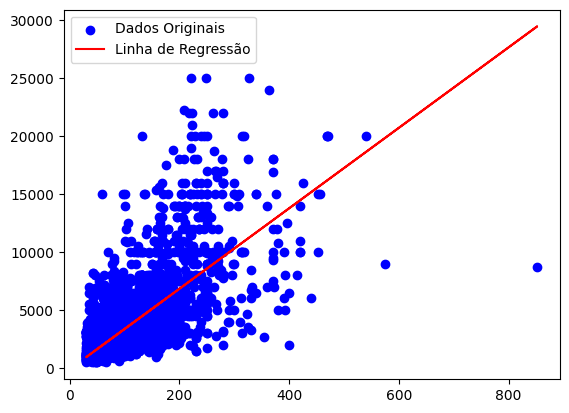

In [51]:
plt.scatter(X, y, color='blue', label='Dados Originais')
plt.plot(X, regressao_linear.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

###É possível perceber uma grande gama de dados conjutos muito proximos ao início dos eixos, uma variação mínima dos valores visualmente, porém na prática não é assim que funciona ainda mais que já temos a informação que o R2 conta com 52.1%.
###Mais a cima os dados ficam muito dispersos e distantes e esta distância não corresponde com a linearidade buscada.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [71]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [72]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_linear.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_linear.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

###Os valores não ficam parelhos mas tambem não tem um distanciamento grande, o distânciamento é mínimo saindo de 52.1% para 56.5%. Mostrando que o modelo está subajustado, tendo a necessidade de se tornar capaz de capaz de capturar a relação entre as variáveis de forma mais eficaz.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [77]:
#seu código aqui
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [78]:
X_train_unenc, X_test_unenc, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [79]:
X_train = pd.get_dummies(X_train_unenc, drop_first=True)
X_test  = pd.get_dummies(X_test_unenc,  drop_first=True)

In [80]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [81]:
if X_train.isnull().any().any() or X_test.isnull().any().any():
    # regra simples: preencher com mediana das colunas do treino
    med = X_train.median()
    X_train = X_train.fillna(med)
    X_test  = X_test.fillna(med)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Tive que fazer alterações como por exemplo tratar dados nulos caso houvessem algum(Já foi feito anteriormente a verificação), uso do one-hot encoding por conta das categorias adicionadas para melhor entendimento dos gráficos.

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [83]:
#seu código aqui
r2_train = model.score(X_train, y_train)
print(f"R² (treino): {r2_train:.4f}")

R² (treino): 0.6174


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [85]:
#seu código aqui
r2_test = model.score(X_test, y_test)
print(f"R² (teste): {r2_test:.4f}")

R² (teste): 0.6295


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

###O modelo de regressão múltipla aparenta ser melhor, pois apresentou resultados melhores do que com a regresão simples. Para teste contamos com 62.9% ou seja como está mais próximo de 100% podemos concluir que o modelo tem mais chances de acerto com o modelo adcionado.